In [7]:
# Import libraries
import collections
import ortools.sat.python.cp_model
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import random

import time
start_time = time.time()

class Job:
    # Create a new job
    def __init__(self,dur:int, skills:[]):

      
        self.dur = dur
        self.skills = skills

class Task:
    # Create a new task
    def __init__(self, start:object, interval:object, end:object):

        # Set values for instance variables
        self.start = start
        self.end = end
        self.interval=interval

class Assignment:
    # Create a new assignment
    def __init__(self, job:int, worker:str, start:int, duration:int, skill:int):
        # Set values for instance variables
        
        self.job = job
        self.worker = worker
        self.start = start
        self.duration = duration
        self.skill = skill
    # Sort
    def __lt__(self, other):
        return self.start + self.duration < other.start + other.duration
    # Print
    def __repr__(self):
        return ('{0}: {1}: {2}, Start: {3}, End: {4}'.format(str.title(self.job), self.worker, self.skill, self.start, self.start + self.duration))


In [16]:
df_project=pd.read_excel('Project_data.xlsx',sheet_name='Project List')
df_emp=pd.read_excel('Project_data.xlsx',sheet_name='Worker List')


# create list of workers for each skill
df_emp['Task1'] = [1 if x == 1 else 0 for x in np.sum(df_emp.values == 'Task1', 1)]
df_emp['Task2'] = [1 if x == 1 else 0 for x in np.sum(df_emp.values == 'Task2', 1)]
df_emp['Task3'] = [1 if x == 1 else 0 for x in np.sum(df_emp.values == 'Task3', 1)]

Skill_Task1 =df_emp['Task1'].tolist()
Skill_Task2=df_emp['Task2'].tolist()
Skill_Task3=df_emp['Task3'].tolist()    

# Input
count_projects = len(df_project)
workers = df_emp['Name'].tolist()

deadline = 300

jobs = {}
jobs2 = {}
jobs3= {}
tasks = {}
worker_tasks = {} 
precedences = []
intervals = collections.defaultdict(list)
assignments = collections.defaultdict(list)
objective = []
a=[]


# Create a model
model = ortools.sat.python.cp_model.CpModel()
project_name=df_project['Name'].tolist()
# print(project)

In [17]:
 # Loop projects
for project_id in range(count_projects):
    #create skill list of project
    prolst=df_project['Skill1'].tolist()
    # jobs['task']=Job(duration, list of workers with skill)
    if prolst[project_id]=='Task1':
        jobs['task'] = Job( 5, Skill_Task1)
    elif prolst[project_id]=='Task2':
        jobs['task'] = Job(6, Skill_Task2)
    else:
        jobs['task'] = Job(2 , Skill_Task3)
    
    #Creates job intervals and add to the corresponding workers.
    for job_id, job in jobs.items():
        duration=job.dur
      
        suffix = '_{0}_{1}'.format(project_id, job_id)
        # Create model variables
        start = model.NewIntVar(0, deadline, 'start' + suffix)
        end = model.NewIntVar(0, deadline, 'end' + suffix)
        interval=model.NewIntervalVar(start, duration, end, 'interval' + suffix)
        # Add a task
        tasks[project_id, job_id] = Task(start, duration, end)
        allocation = []
       
        for worker in range(len(workers)):
            if(job.skills[worker] > 0):
                suffix = '_{0}_{1}_{2}'.format(project_id, job_id, worker)
                presence = model.NewBoolVar('presence' + suffix)
                interval = model.NewOptionalIntervalVar(start, duration, end, presence, 'interval' + suffix)
                worker_tasks[project_id, job_id, worker] = presence                
                intervals[worker].append(interval)
                allocation.append(presence)
                objective.append(job.skills[worker] * presence)
                        
        model.Add(sum(allocation) == 1)


_0_task_0
dict_items([((0, 'task', 0), presence_0_task_0(0..1))])
_0_task_3
dict_items([((0, 'task', 0), presence_0_task_0(0..1)), ((0, 'task', 3), presence_0_task_3(0..1))])
_0_task_5
dict_items([((0, 'task', 0), presence_0_task_0(0..1)), ((0, 'task', 3), presence_0_task_3(0..1)), ((0, 'task', 5), presence_0_task_5(0..1))])
_0_task_6
dict_items([((0, 'task', 0), presence_0_task_0(0..1)), ((0, 'task', 3), presence_0_task_3(0..1)), ((0, 'task', 5), presence_0_task_5(0..1)), ((0, 'task', 6), presence_0_task_6(0..1))])
_0_task_7
dict_items([((0, 'task', 0), presence_0_task_0(0..1)), ((0, 'task', 3), presence_0_task_3(0..1)), ((0, 'task', 5), presence_0_task_5(0..1)), ((0, 'task', 6), presence_0_task_6(0..1)), ((0, 'task', 7), presence_0_task_7(0..1))])
_0_task_9
dict_items([((0, 'task', 0), presence_0_task_0(0..1)), ((0, 'task', 3), presence_0_task_3(0..1)), ((0, 'task', 5), presence_0_task_5(0..1)), ((0, 'task', 6), presence_0_task_6(0..1)), ((0, 'task', 7), presence_0_task_7(0..1)), ((0

dict_items([((0, 'task', 0), presence_0_task_0(0..1)), ((0, 'task', 3), presence_0_task_3(0..1)), ((0, 'task', 5), presence_0_task_5(0..1)), ((0, 'task', 6), presence_0_task_6(0..1)), ((0, 'task', 7), presence_0_task_7(0..1)), ((0, 'task', 9), presence_0_task_9(0..1)), ((0, 'task', 10), presence_0_task_10(0..1)), ((0, 'task', 12), presence_0_task_12(0..1)), ((0, 'task', 13), presence_0_task_13(0..1)), ((1, 'task', 4), presence_1_task_4(0..1)), ((1, 'task', 5), presence_1_task_5(0..1)), ((1, 'task', 8), presence_1_task_8(0..1)), ((2, 'task', 1), presence_2_task_1(0..1)), ((2, 'task', 2), presence_2_task_2(0..1)), ((2, 'task', 5), presence_2_task_5(0..1)), ((2, 'task', 11), presence_2_task_11(0..1)), ((2, 'task', 14), presence_2_task_14(0..1)), ((3, 'task', 0), presence_3_task_0(0..1)), ((3, 'task', 3), presence_3_task_3(0..1)), ((3, 'task', 5), presence_3_task_5(0..1)), ((3, 'task', 6), presence_3_task_6(0..1)), ((3, 'task', 7), presence_3_task_7(0..1)), ((3, 'task', 9), presence_3_task

In [18]:
# Avoid overlapping between tasks of each worker
for worker in range(len(workers)):
    model.AddNoOverlap(intervals[worker])
#     model.Add(sum(allocation) == 1)
# Create an objective function


# Create a solver
solver = ortools.sat.python.cp_model.CpSolver()

# Solve the problem
status = solver.Solve(model)


--- Final solution ---

Optimal Total Skill: 0.0

Emp_1
Emp_2
Emp_4
Emp_5
[[(0, 5), (0, 5), (0, 5)], [(0, 6), (0, 6), (0, 6)], [(0, 2), (0, 2), (0, 2)], [(0, 5), (0, 5), (0, 5)], [(5, 5), (5, 5), (5, 5)], [(6, 6), (6, 6), (6, 6)], [(10, 5), (10, 5), (10, 5)], [(15, 5), (15, 5), (15, 5)], [(2, 2), (2, 2), (2, 2)], [(4, 2), (4, 2), (4, 2)], [(6, 2), (6, 2), (6, 2)], [(8, 2), (8, 2), (8, 2)], [(10, 2), (10, 2), (10, 2)], [(20, 5), (20, 5), (20, 5)], [(12, 2), (12, 2), (12, 2)], [(25, 5), (25, 5), (25, 5)], [(12, 6), (12, 6), (12, 6)], [(30, 5), (30, 5), (30, 5)], [(18, 6), (18, 6), (18, 6)], [(14, 2), (14, 2), (14, 2)], [(24, 6), (24, 6), (24, 6)], [(35, 5), (35, 5), (35, 5)], [(30, 6), (30, 6), (30, 6)], [(40, 5), (40, 5), (40, 5)], [(36, 6), (36, 6), (36, 6)], [(45, 5), (45, 5), (45, 5)], [(42, 6), (42, 6), (42, 6)], [(50, 5), (50, 5), (50, 5)], [(48, 6), (48, 6), (48, 6)], [(55, 5), (55, 5), (55, 5)], [(54, 6), (54, 6), (54, 6)], [(60, 5), (60, 5), (60, 5)], [(60, 6), (60, 6), (60, 6)]

C:\Users\Cloobot-Franklin\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


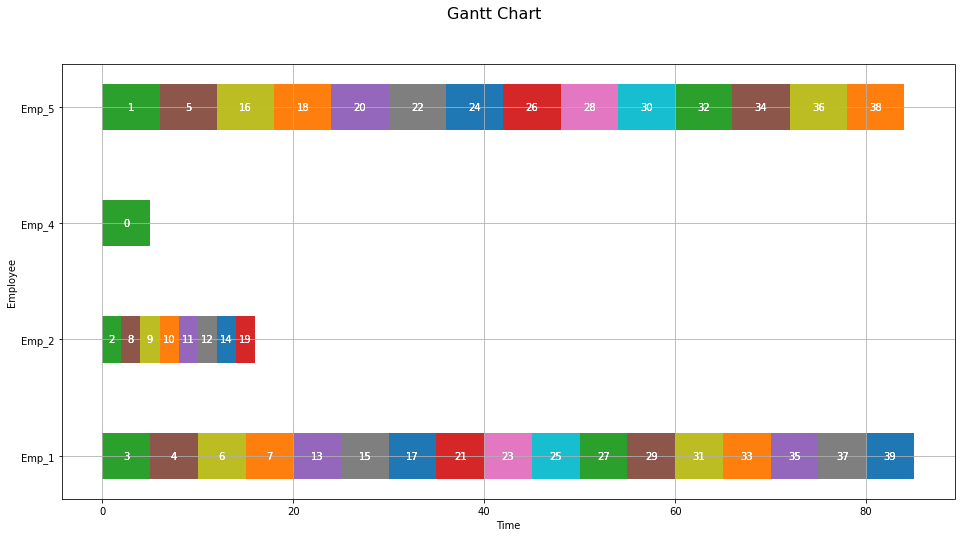

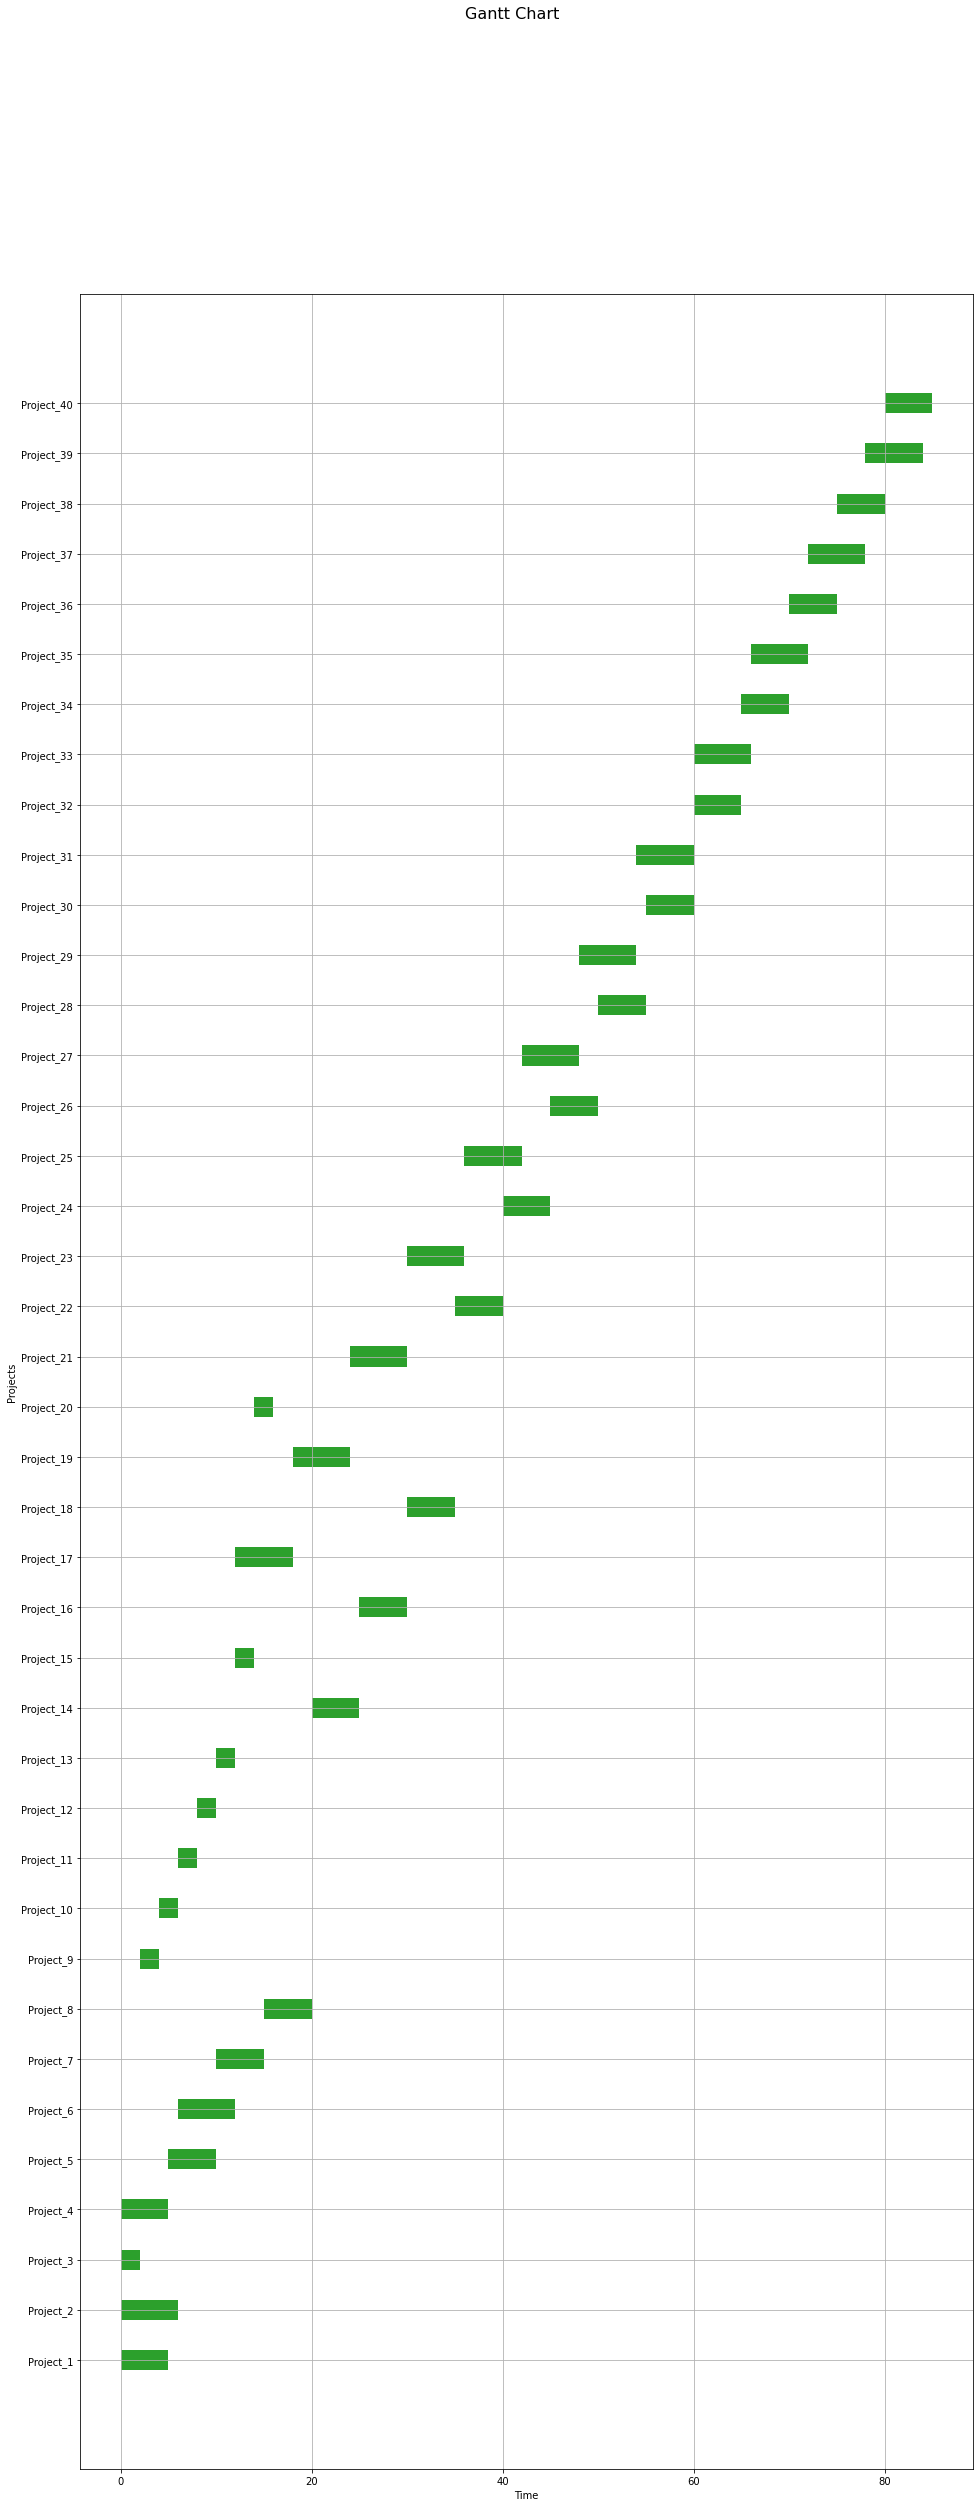

In [21]:
if (status == ortools.sat.python.cp_model.OPTIMAL):
    for project_id in range(count_projects):
        
        if prolst[project_id]=='Task1':
            jobs['task'] = Job( 5, Skill_Task1)
        elif prolst[project_id]=='Task2':
            jobs['task'] = Job(6, Skill_Task2)
        else:
            jobs['task'] = Job(2 , Skill_Task3)

        for job_id, task in jobs.items():
            start = solver.Value(tasks[project_id, job_id].start)  
            worker = 0
            for w in range(len(workers)):                 
                if(task.skills[w] > 0 and solver.Value(worker_tasks[project_id, job_id, w]) >= 1):
                    worker = w
                    break
            duration1 = task.dur                 
            assignments[project_id].append(Assignment(job_id, workers[worker], start, task.dur, task.skills[worker]))

    # Create bars and sort assignments
    bars = []
    appended_data=[]
    for project_id in range(count_projects):
        assignments[project_id].sort()
        bar_task=[]
        bar_start = []
        bar_dur=[]
        bar_worker=[]
        for ass in assignments[project_id]:
            bar_task.append(ass.job)
            bar_start.append(ass.start)
            bar_dur.append(ass.duration)
            bar_worker.append(ass.worker)
            df=pd.DataFrame([dict(Project=project_id,Task=ass.job, Start=ass.start, Finish=ass.duration, Resource=ass.worker)])
    #                 print(df)
            appended_data.append(df)
    data=pd.concat(appended_data)
    sorted_data=data.sort_values(by=['Resource'])
    sorted_data['C'] = list(zip(sorted_data.Start, sorted_data.Finish))
    newdata=sorted_data.sort_values(by=['Project'])
    newdata.to_excel('test.xlsx')

    print('--- Final solution ---\n')
    print('Optimal Total Skill: {0}\n'.format(solver.ObjectiveValue()))
    #     for project_id in range(count_projects):
    #         print('Project:', project_id + 1)
    #         print(*assignments[project_id], sep='\n')
    #         print()
    #     print()

    # Loop bars for employee
    lst=[]
    pro=[]
    for i in sorted_data.Resource.unique():
        emp=sorted_data[sorted_data.Resource==i]
        emp.sort_values(by=['Project'],inplace=True)
        s=emp['C'].tolist()
        lst.append(s)
        pro.append(emp['Project'].tolist())

    # Plot gantt chart
    fig, gnt1 = plt.subplots(figsize=(16, 8))
    fig.suptitle('Gantt Chart', fontsize=16)
    gnt1.set_xlabel('Time') 
    gnt1.set_ylabel('Employee') 
    y_ticks1=list(range(12,10*(len(sorted_data['Resource'].unique())+1),10))
    gnt1.set_yticks(y_ticks1) 
    w1=[]
    for w in sorted_data['Resource'].unique():
        print(w)
        w1.append(w)

    gnt1.set_yticklabels(w1)

    gnt1.grid(True)
    for i in range(len(lst)):   
        gnt1.broken_barh(lst[i], (10 + i * 10, 4), facecolors=('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'))

        for (x1, x2),j in zip(lst[i],pro[i]):
            gnt1.text(x=x1 + x2/2, y= 12 + i * 10, s=j, ha='center', va='center', color='white')

    # plot projects
    barss = []
    for project_id in range(count_projects):
        assignments[project_id].sort()
        bars_tasks = []
        for ass in assignments[project_id]:
            bars_tasks.append((ass.start, ass.duration))
        barss.append(bars_tasks)
    print(barss)        
    # Print the solution

    # Plot gantt chart
    fig, gnt = plt.subplots(figsize=(16, 40))
    fig.suptitle('Gantt Chart', fontsize=16)
    gnt.set_xlabel('Time') 
    gnt.set_ylabel('Projects') 
    y_ticks=list(range(12,10*(count_projects+1),10))
    gnt.set_yticks(y_ticks) 

    gnt.set_yticklabels(project_name) 
    gnt.grid(True)
    # Loop bars
    for i in range(len(barss)):
        gnt.broken_barh(barss[i], (10 + i * 10, 4), facecolors=('tab:blue', 'tab:orange', 'tab:green'))




In [ ]:
end_time = time.time()
print(f"The execution time is: {end_time-start_time}")